In [13]:
import osmnx as ox
import networkx as nx
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from pyproj import CRS
import contextily as ctx

In [28]:
name = "Kamppi, Helsinki, Finland"


# Retrieve the network
graph = ox.graph_from_place(name, network_type='bike')

/Users/mac/anaconda3/envs/ox/lib/python3.10/site-packages/osmnx/geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


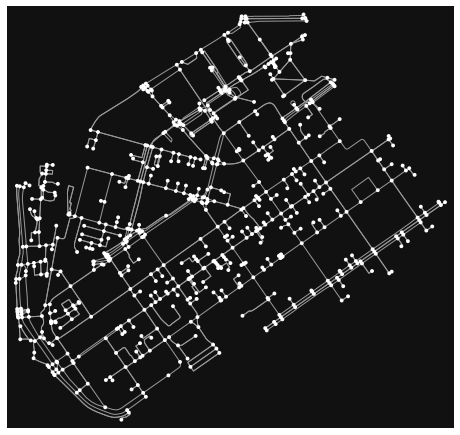

In [29]:
# plot the graph:
fig, ax = ox.plot_graph(graph)

In [33]:
# Get the area of interest polygon
place_polygon = ox.geocode_to_gdf(name)

# Re-project the polygon to a local projected CRS 
place_polygon = place_polygon.to_crs(epsg=3067)

# Buffer a bit
place_polygon["geometry"] = place_polygon.buffer(200)

# Re-project the polygon back to WGS84, as required by osmnx
place_polygon = place_polygon.to_crs(epsg=4326)

# Retrieve the network
graph = ox.graph_from_polygon(place_polygon["geometry"].values[0], network_type='bike')

/Users/mac/anaconda3/envs/ox/lib/python3.10/site-packages/osmnx/geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


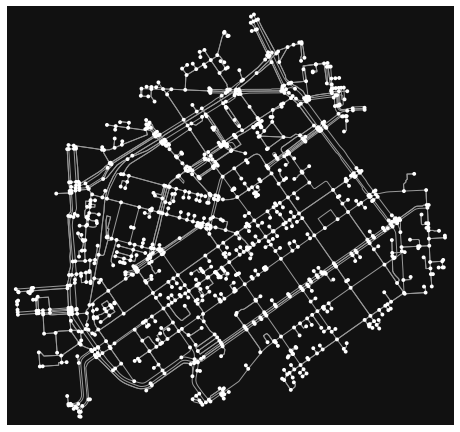

In [35]:
fig, ax = ox.plot_graph(graph)

In [36]:
edges = ox.graph_to_gdfs(graph, nodes=False, edges=True)

In [37]:
edges.columns

Index(['osmid', 'oneway', 'lanes', 'name', 'highway', 'maxspeed', 'length',
       'geometry', 'junction', 'access', 'bridge', 'tunnel', 'service'],
      dtype='object')